In [ ]:
# %pip install --upgrade --user xarray matplotlib numpy seaborn pandas pyarrow requests tqdm netcdf4

In [1]:
import xarray as xr

## Describing Relationships Between Arrays: Building a Dataset using XArray

When working with real data, the number of variables to manage and their relationships can get complex quite quickly.  The `xarray` package helps with this problem by storing the names and relationships of multidimensional arrays.  `xarray` offers two levels of organization: 
  - The `DataArray`: A multidimensional array, its name, labels describing each of its dimensions.
  - The `Dataset`: A collection of `DataArrays` and their relationships.

We'll be working with a good amount of data organized in `xarray`, mainly to load data, select the variables we're interested in, and convert the data into the structure we want, so let's take a little time to familiarize with some of these features

### DataArray: Labeling the Indices of Array's Dimensions

| Code | Description |
| :-- | :-- |
| `da = xr.DataArray(data=x, coords={'time': y}, name='sensor')` | Make a DataArray from the equal-length arrays `x` and `y`, describing `x` as a sensor data and `y` as the time points for each measurement. |
| `da = xr.DataArray(data=x, coords={'time': y, 'channel': z}, name='sensor')` | Make a 2D DataArray from `x`, `y`, and `z`, where z is the channel names in the sensor data. |
| `da.loc[1:1.5]` | Get the sensor data from time points 1-1.5 secs. |
| `da.loc[1:1.5, :]` | Get the sensor data from time points 1-1.5 secs, and all channels. |
| `da.plot.scatter()` | Make a scatter plot |
| `da.to_numpy()` | Get a Numpy array from the sensor data. |
| `da['time'].to_numpy()` | Get a Numpy array from the `time` coordinate data |


**Exercises**: Let's create some DataArrays

**Example**: The arrays below represent temperature measurements, where `x` is the measurements and `time` is the time that the measurements were taken.  Put the two arrays into a DataArray together.

In [28]:
time = np.linspace(1, 3, 200)
x = time ** 1.8 + np.random.normal(0, 1, size=200)

In [29]:
data = xr.DataArray(
    data=x, 
    coords={'time': time}, 
    name='temp',
)
data[:5]

<xarray.DataArray 'temp' (time: 5)> Size: 40B
array([1.01927338, 2.16068616, 1.83646304, 1.72865447, 0.35047977])
Coordinates:
  * time     (time) float64 40B 1.0 1.01 1.02 1.03 1.04

Plot the data as a scatter plot.

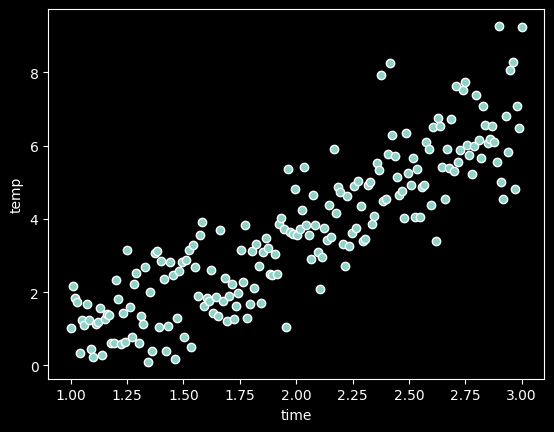

In [30]:
data.plot.scatter()

Get all the measurements taken between t=1 and t=1.8.

In [31]:
data.loc[1:1.8]

<xarray.DataArray 'temp' (time: 80)> Size: 640B
array([1.01927338, 2.16068616, 1.83646304, 1.72865447, 0.35047977,
       1.24328849, 1.10406167, 1.68030256, 1.24803914, 0.45105978,
       0.22719446, 1.13279533, 1.19686551, 1.56138736, 0.27542996,
       1.25810003, 1.39467722, 1.36638699, 0.61442642, 0.62179864,
       2.34608863, 1.82173772, 0.57129891, 1.43134842, 0.64565721,
       3.15975788, 1.5915646 , 0.77532047, 2.21243113, 2.52982388,
       0.61593647, 1.36224477, 1.12176585, 2.67714649, 0.09522498,
       2.00902556, 0.38717055, 3.06978243, 3.11645958, 1.0571356 ,
       2.86233049, 2.36840054, 0.38400341, 1.08169232, 2.82583072,
       2.46173301, 0.18228808, 1.2892072 , 2.57239782, 2.81079435,
       0.78280832, 2.87658527, 3.16266312, 0.51056631, 3.2775197 ,
       2.6999743 , 1.90211059, 3.56261072, 3.90593695, 1.6094064 ,
       1.84782859, 1.7601099 , 2.59827493, 1.43390728, 1.8621153 ,
       1.33601065, 3.68959745, 1.76041551, 2.37797818, 1.20595844,
       1.90166089, 2.2258206 , 1.2565033 , 1.62830618, 1.96484675,
       3.15686101, 2.28919926, 3.82638319, 1.28303705, 1.68422915])
Coordinates:
  * time     (time) float64 640B 1.0 1.01 1.02 1.03 ... 1.764 1.774 1.784 1.794

Get the sensor data as a numpy array

In [32]:
data.to_numpy()

array([1.01927338, 2.16068616, 1.83646304, 1.72865447, 0.35047977,
       1.24328849, 1.10406167, 1.68030256, 1.24803914, 0.45105978,
       0.22719446, 1.13279533, 1.19686551, 1.56138736, 0.27542996,
       1.25810003, 1.39467722, 1.36638699, 0.61442642, 0.62179864,
       2.34608863, 1.82173772, 0.57129891, 1.43134842, 0.64565721,
       3.15975788, 1.5915646 , 0.77532047, 2.21243113, 2.52982388,
       0.61593647, 1.36224477, 1.12176585, 2.67714649, 0.09522498,
       2.00902556, 0.38717055, 3.06978243, 3.11645958, 1.0571356 ,
       2.86233049, 2.36840054, 0.38400341, 1.08169232, 2.82583072,
       2.46173301, 0.18228808, 1.2892072 , 2.57239782, 2.81079435,
       0.78280832, 2.87658527, 3.16266312, 0.51056631, 3.2775197 ,
       2.6999743 , 1.90211059, 3.56261072, 3.90593695, 1.6094064 ,
       1.84782859, 1.7601099 , 2.59827493, 1.43390728, 1.8621153 ,
       1.33601065, 3.68959745, 1.76041551, 2.37797818, 1.20595844,
       1.90166089, 2.2258206 , 1.2565033 , 1.62830618, 1.96484

Get the time data as a numpy array

In [33]:
data.time.to_numpy()

array([1.        , 1.01005025, 1.0201005 , 1.03015075, 1.04020101,
       1.05025126, 1.06030151, 1.07035176, 1.08040201, 1.09045226,
       1.10050251, 1.11055276, 1.12060302, 1.13065327, 1.14070352,
       1.15075377, 1.16080402, 1.17085427, 1.18090452, 1.19095477,
       1.20100503, 1.21105528, 1.22110553, 1.23115578, 1.24120603,
       1.25125628, 1.26130653, 1.27135678, 1.28140704, 1.29145729,
       1.30150754, 1.31155779, 1.32160804, 1.33165829, 1.34170854,
       1.35175879, 1.36180905, 1.3718593 , 1.38190955, 1.3919598 ,
       1.40201005, 1.4120603 , 1.42211055, 1.4321608 , 1.44221106,
       1.45226131, 1.46231156, 1.47236181, 1.48241206, 1.49246231,
       1.50251256, 1.51256281, 1.52261307, 1.53266332, 1.54271357,
       1.55276382, 1.56281407, 1.57286432, 1.58291457, 1.59296482,
       1.60301508, 1.61306533, 1.62311558, 1.63316583, 1.64321608,
       1.65326633, 1.66331658, 1.67336683, 1.68341709, 1.69346734,
       1.70351759, 1.71356784, 1.72361809, 1.73366834, 1.74371

The arrays below represent Neuropixel voltage measurements (time x chans).  Put them together into an `xarray` DataArray:

In [40]:
t = np.linspace(0, 20, 300)
chans = ['CHAN-1', 'CHAN-2', 'CHAN-4', 'CHAN-8']
x = np.random.normal(size=(len(t), len(chans)))

In [41]:
data = xr.DataArray(
    data=x,
    name='neuropixel',
    coords={'time': t, 'channels': chans}
)
data

<xarray.DataArray 'neuropixel' (time: 300, channels: 4)> Size: 10kB
array([[ 2.28914843,  0.79580557,  1.67455044,  0.06572757],
       [-0.02440869,  0.40200458,  0.84111654, -0.04639544],
       [ 1.85216471, -0.05236132, -1.83566503,  0.38645464],
       ...,
       [-1.53098914,  0.01422252, -0.48773682, -1.01014815],
       [-0.93815986, -0.08260129,  1.13278402, -0.62826012],
       [-0.50791716,  0.43889677,  1.13241609, -0.21662272]])
Coordinates:
  * time      (time) float64 2kB 0.0 0.06689 0.1338 0.2007 ... 19.87 19.93 20.0
  * channels  (channels) <U6 96B 'CHAN-1' 'CHAN-2' 'CHAN-4' 'CHAN-8'

Get the sensor data as a numpy array:

In [43]:
data.to_numpy()[:5]

array([[ 2.28914843,  0.79580557,  1.67455044,  0.06572757],
       [-0.02440869,  0.40200458,  0.84111654, -0.04639544],
       [ 1.85216471, -0.05236132, -1.83566503,  0.38645464],
       [-0.12900389,  1.08903003,  0.41413163,  0.40855854],
       [-1.48756385,  0.47602643, -1.99852211, -0.52436173]])

Get the channel names:

In [42]:
data['channels']

<xarray.DataArray 'channels' (channels: 4)> Size: 96B
array(['CHAN-1', 'CHAN-2', 'CHAN-4', 'CHAN-8'], dtype='<U6')
Coordinates:
  * channels  (channels) <U6 96B 'CHAN-1' 'CHAN-2' 'CHAN-4' 'CHAN-8'

Get Channel 4's sensor data

In [48]:
data.loc[:, "CHAN-4"][:5]

<xarray.DataArray 'neuropixel' (time: 5)> Size: 40B
array([ 1.67455044,  0.84111654, -1.83566503,  0.41413163, -1.99852211])
Coordinates:
  * time      (time) float64 40B 0.0 0.06689 0.1338 0.2007 0.2676
    channels  <U6 24B 'CHAN-4'

Get the data taken on Channel 1-2, at at times 5 secs - 12 secs.

In [47]:
data.loc[5:12, 'CHAN-1':'CHAN-2'][:5]

<xarray.DataArray 'neuropixel' (time: 5, channels: 2)> Size: 80B
array([[-1.80926582, -0.21850036],
       [ 0.4424023 ,  0.49387104],
       [-0.09162516,  0.57112003],
       [-0.3206879 ,  0.27697232],
       [-1.18839789,  0.0054826 ]])
Coordinates:
  * time      (time) float64 40B 5.017 5.084 5.151 5.217 5.284
  * channels  (channels) <U6 48B 'CHAN-1' 'CHAN-2'

### Working with XArray Datasets

Datasets describe the relationships between multiple data variables, often connected by their coordinates.  For example, there could be different behavioral measruements taken at the same time points, or different data might be related to the same subject.  `xr.Dataset` objects help in this way to describe a more-complete picture of an experiment.


Let's explore Datasets by looking at the data from a session of the [Steinmetz et al, 2019 paper](https://www.nature.com/articles/s41586-019-1787-x)! In this notebook, we'll be exploring the spike counts data recorded during a specific session and investigate differences between brain regions and their relation to behavioral, task, or performance variables.  This data, stored in the netCDF format (the `.nc` extension), can be loaded as an XArray Dataset.

Run the following code to download the dataset:

In [3]:
# Add path with self-created packages and import them
import sys
sys.path.append('../src')
import sciebo

# Download data
sciebo.download_file('https://uni-bonn.sciebo.de/s/YT3iaH9Po0LJMxR', f'data/steinmetz_2017-12-05_Lederberg.nc')

Run the following code to load the dataset into Python using XArray.  Once the dataset is loaded, explore it a little bit using the graphical interface, to see what variables were collected in this study.  Note that different variables are related to different sets of coordinates:

In [4]:
import xarray as xr
dset = xr.load_dataset(f"data/steinmetz_2017-12-05_Lederberg.nc")
dset

<xarray.Dataset> Size: 125MB
Dimensions:             (trial: 340, time: 250, cell: 698,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 12, spike_id: 3185888)
Coordinates:
  * trial               (trial) int32 1kB 1 2 3 4 5 6 ... 336 337 338 339 340
  * time                (time) float64 2kB 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 3kB 1 2 3 4 5 6 ... 693 694 695 696 697 698
  * waveform_component  (waveform_component) int32 12B 1 2 3
  * probe               (probe) int32 2kB 1 2 3 4 5 6 ... 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) <U5 240B 'DG' 'LGd' ... 'MD' 'VISam'
  * spike_id            (spike_id) int32 13MB 1 2 3 ... 3185886 3185887 3185888
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 340B 0 0 0 100 25 50 0 0 ... 0 0 0 0 0 0 0
    contrast_right      (trial) int8 340B 0 0 0 50 50 50 ... 100 100 100 100 100
    gocue               (trial) float64 3kB 0.4884 0.5617 ... 0.7894 0.7892
    stim_onset          (trial) float64 3kB 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 3kB 1.0 -1.0 1.0 1.0 ... -1.0 -1.0 -1.0
    feedback_time       (trial) float64 3kB 2.028 0.9821 2.175 ... 2.331 2.316
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 687kB 0.0 ...
    waveform_u          (cell, waveform_component, probe) float32 3MB 0.0 ......
    lfp                 (brain_area_lfp, trial, time) float64 8MB -57.29 ... ...
    spike_time          (spike_id) float32 13MB 0.01967 0.09227 ... 2.355 2.475
    spike_cell          (spike_id) uint32 13MB 1 1 1 1 1 ... 698 698 698 698 698
    spike_trial         (spike_id) uint32 13MB 1 1 1 1 1 ... 450 450 450 450 450

**Exercises**: Use the `dset` Dataset to do the following tasks:

**Example**: Get the reaction time for each trial in the session:

In [4]:
dset['reaction_time'][:10]

<xarray.DataArray 'reaction_time' (trial: 10)> Size: 80B
array([740., 160., 730., 210., 160., 220., 170., 130., 100., 140.])
Coordinates:
  * trial    (trial) int32 40B 1 2 3 4 5 6 7 8 9 10

Get the response type for each trial:

In [5]:
dset['response_type'][:10]

<xarray.DataArray 'response_type' (trial: 10)> Size: 80B
array([ 0.,  1.,  0.,  1., -1., -1., -1., -1.,  1., -1.])
Coordinates:
  * trial    (trial) int32 40B 1 2 3 4 5 6 7 8 9 10

Get the contrast levels of both the left and right stimulus for each trial (note: you'll need double-square brackets for this (e.g. `dset[['a', 'b']]`)):

In [7]:
dset[['contrast_left', 'contrast_right']]

<xarray.Dataset> Size: 2kB
Dimensions:         (trial: 340)
Coordinates:
  * trial           (trial) int32 1kB 1 2 3 4 5 6 7 ... 335 336 337 338 339 340
Data variables:
    contrast_left   (trial) int8 340B 0 0 0 100 25 50 0 0 ... 0 0 0 0 0 0 0 0
    contrast_right  (trial) int8 340B 0 0 0 50 50 50 ... 100 100 100 100 100 100

Get the response times for trials 10 through 16 (tip: `.loc[1:5]`):

In [8]:
dset['response_time'].loc[10:16]

<xarray.DataArray 'response_time' (trial: 7)> Size: 56B
array([0.55870603, 0.97381392, 0.65443056, 0.76496615, 1.99861344,
       0.69717263, 1.90782541])
Coordinates:
  * trial    (trial) int32 28B 10 11 12 13 14 15 16

---

## Spike Count Analysis For Specific Brain Regions: Practicing Logical Indexing on Multidimensional Numpy Arrays

Different areas in the brain are commonly believed to specialize in specific aspects of behavior or task. This makes analyzing spiking activity across brain regions an essential step in many neuroscience data analysis pipelines. Over the next couple of exercises let's focus on how the spike counts of neurons differ across different brain regions.


| **Code**                         | **Description**                                                                                                          |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| `np.unique(data)`                    | Finds the unique elements of an array.                |
| `bool_array = var_name == specific_value`   | Creates a boolean array where each element is `True` if the corresponding element in `var_name` equals `specific_value`; otherwise `False`. |
| `var_name[bool_array]`        | Uses a boolean array to filter elements of `var_name`, selecting only those that correspond to `True` in the boolean array. |
| `var_name.mean(axis=0)`  | Compute the mean across the first dimension, i.e. across rows. |
| `var_name.mean(axis=(0, 1))` | Compute the mean across the first and second dimensions |
| `plt.imshow(data)` | For a 2D array, make a heat map. |
| `plt.plot(x, y)` | Make a line plot. |


**Exercises**

For the exercises below, we'll use the `spike_count` and `brain_groups` variables and their associated coordinate data to explore some of the spiking data.  Run the code cells below to get the variables we'lll use:

In [5]:
import numpy as np

In [6]:
dset['spike_count'].dims, dset['spike_count'].shape, dset['spike_count'].dtype

(('cell', 'trial', 'time'), (698, 340, 250), dtype('int8'))

In [7]:
dset['brain_groups'].dims, dset['brain_groups'].shape, np.unique(dset['brain_groups'])

(('cell',),
 (698,),
 array(['hippocampus', 'non-visual cortex', 'root', 'thalamus',
        'visual cortex'], dtype='<U17'))

In [8]:
spike_counts = dset["spike_count"].to_numpy()
brain_areas = dset["brain_groups"].to_numpy()
times = dset['time'].to_numpy()
cells = dset['cell'].to_numpy()
trials = dset['trial'].to_numpy()

**Example**: What is the total number of neurons recorded from the `visual cortex`?

In [9]:
np.sum(brain_areas == 'visual cortex')


145

What is the total number of neurons recorded from `thalamus`?

In [10]:
np.sum(brain_areas == 'thalamus')


155

What is the proportion of neurons recorded from `hippocampus`?

In [11]:
np.sum(brain_areas == 'hippocampus')


220

How many non-zero spike count measurements were there?

In [13]:
np.sum(spike_counts > 0)

2301519

**Example**: What proportion of cells had more than 300 spikes measured across all trials?

In [24]:
np.mean(np.sum(spike_counts, axis=(1, 2)) > 300)

0.7263610315186246

(extra): What proportion of trials had more than 6000 spikes across all cells measured?

In [32]:
np.mean(np.sum(spike_counts, axis=(0, 2)) > 6000)

0.9941176470588236

**Example**: Compute the population spike count (i.e. average spike count across all neurons) for neurons in `thalamus`, and visualize it using the `plt.imshow()` plotting function. 

In [34]:
brain_areas.shape

(698,)

In [35]:
spike_counts.shape

(698, 340, 250)

**Example**: From the spike counts, extract out all the trials and time points, but only the cells from the thalamus brain area. Plot the total spike counts across trials as a heat map.

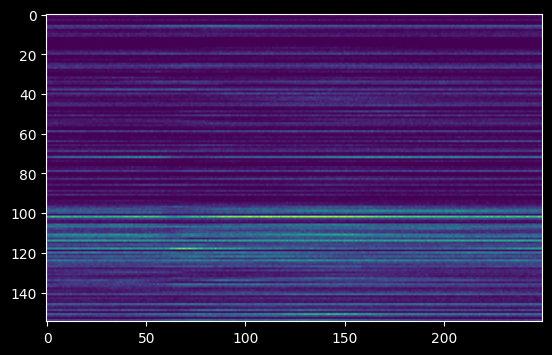

In [80]:
import matplotlib.pyplot as plt

data = spike_counts[brain_areas == 'thalamus', :, :]
total_spikes = data.sum(axis=1)
plt.imshow(total_spikes);
# plt.xticks(np.arange(len(times))[::30], times[::30]);  # for correct time labels

From the spike counts, extract out all the trials and time points, but only the cells from the Visual cortex brain area. Plot the total spike counts across trials as a heat map.

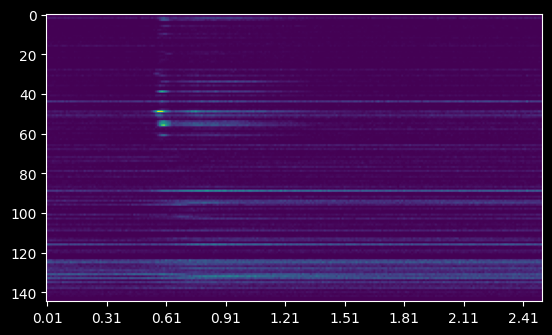

In [85]:
data = spike_counts[brain_areas == 'visual cortex', :, :]
total_spikes = data.sum(axis=1)
plt.imshow(total_spikes);
plt.xticks(np.arange(len(times))[::30], times[::30]);  # for correct time labels

For each and time point trial, show the total activity across all cells in the visual cortex

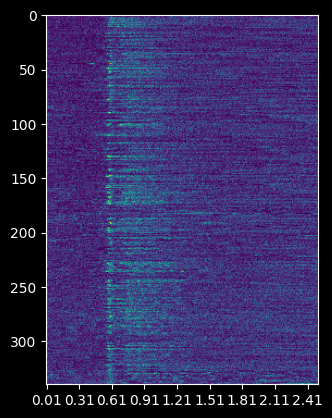

In [91]:
data = spike_counts[brain_areas == 'visual cortex', :, :]
total_spikes = data.sum(axis=0)
plt.imshow(total_spikes);
plt.xticks(np.arange(len(times))[::30], times[::30]);  # for correct time labels

For each and time point trial, show the total activity across all cells in the hippocampus:

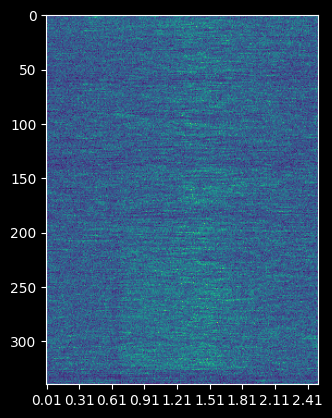

In [95]:
data = spike_counts[brain_areas == 'thalamus', :, :]
total_spikes = data.sum(axis=0)
plt.imshow(total_spikes);
plt.xticks(np.arange(len(times))[::30], times[::30]);  # for correct time labels

**Example**: Make a line plot showing the average number of total spikes for all cells in the thalamus:

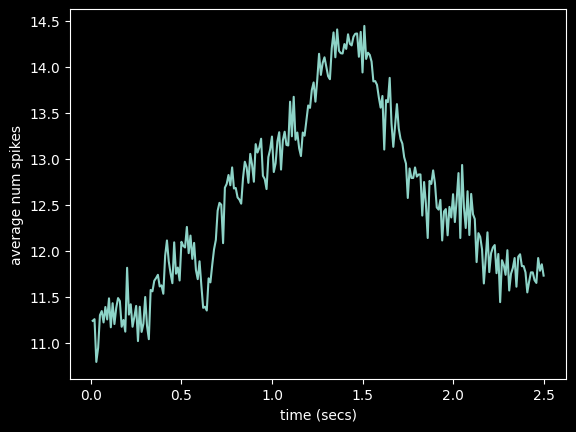

In [101]:
data = spike_counts[brain_areas == 'thalamus', :, :].sum(axis=0).mean(axis=0)
plt.plot(times, data);
plt.xlabel('time (secs)')
plt.ylabel('average num spikes');

Make a line plot showing the total number of total spikes for all cells in the hippocampus:

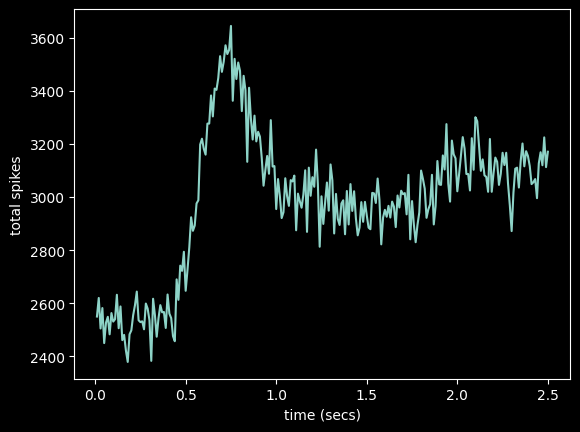

In [105]:
data = spike_counts[brain_areas == 'hippocampus', :, :].sum(axis=0).sum(axis=0)
plt.plot(times, data);
plt.xlabel('time (secs)')
plt.ylabel('total spikes');

Make a line plot showing the average number of total spikes for all cells in the visual cortex:

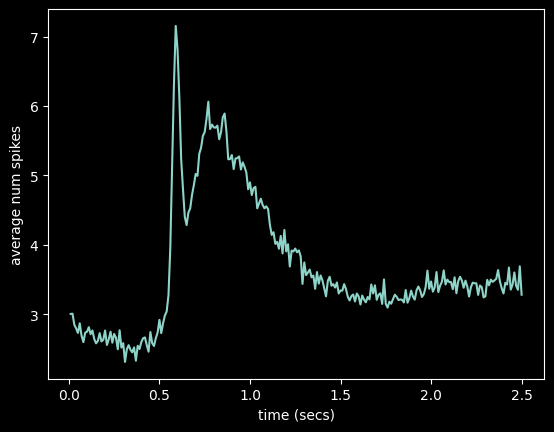

In [103]:
data = spike_counts[brain_areas == 'visual cortex', :, :].sum(axis=0).mean(axis=0)
plt.plot(times, data);
plt.xlabel('time (secs)')
plt.ylabel('average num spikes');

Make a plot showing the average spike counts for all three brain areas (visual cortex, thalamus, and hippocampus)

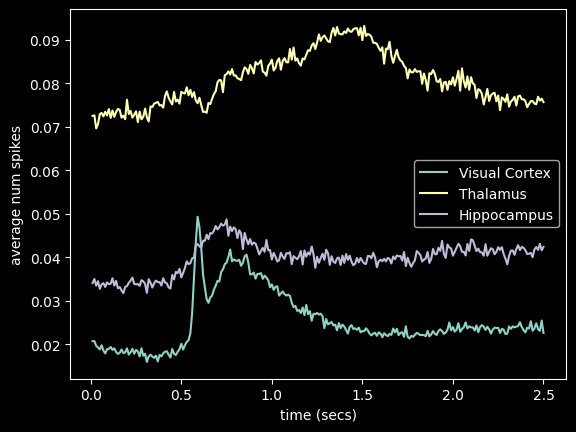

In [109]:
data = spike_counts[brain_areas == 'visual cortex', :, :].mean(axis=0).mean(axis=0)
plt.plot(times, data, label='Visual Cortex');

data = spike_counts[brain_areas == 'thalamus', :, :].mean(axis=0).mean(axis=0)
plt.plot(times, data, label='Thalamus');

data = spike_counts[brain_areas == 'hippocampus', :, :].mean(axis=0).mean(axis=0)
plt.plot(times, data, label='Hippocampus');

plt.xlabel('time (secs)')
plt.ylabel('average num spikes');
plt.legend();

---

## Demo: Simplifying this process using XArray

This can also be done without creating a bunch of variables.  Here's an example:

**Example**:

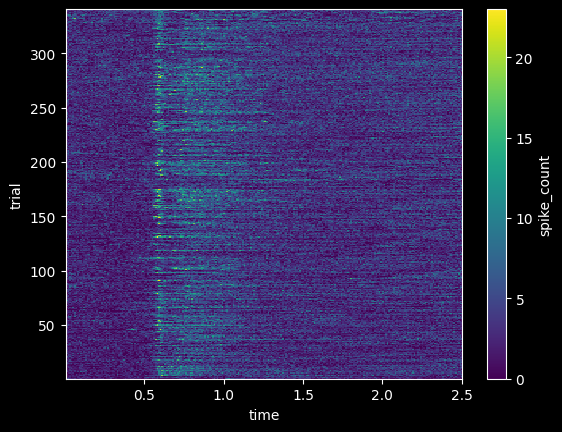

In [127]:
dset['spike_count'][dset['brain_groups'] == 'visual cortex'].sum(dim='cell').plot.imshow();

**Example**:

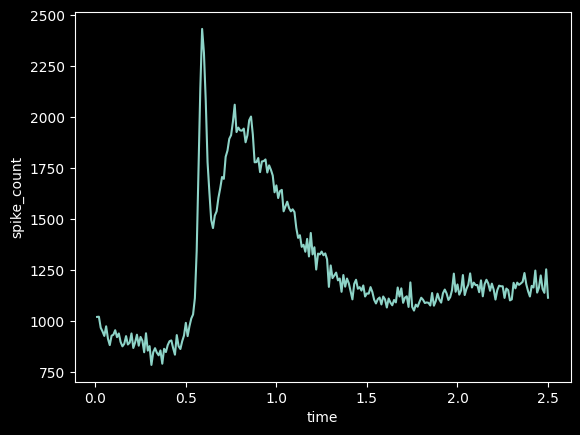

In [128]:
dset['spike_count'][dset['brain_groups'] == 'visual cortex'].sum(dim=('cell', 'trial')).plot.line();

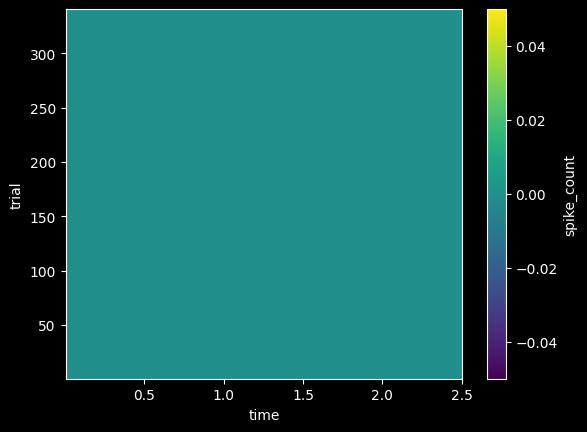